In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random as rd
from math import sqrt

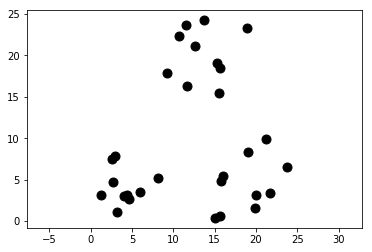

In [13]:
# Créer points en 2D

nb = 10
x1 = [rd.random()*10 for i in range(nb)]
y1 = [rd.random()*10 for i in range(nb)]
x2 = [15 + rd.random()*10 for i in range(nb)]
y2 = [rd.random()*10 for i in range(nb)]
x3 = [9 + rd.random()*10 for i in range(nb)]
y3 = [15 + rd.random()*10 for i in range(nb)]

# Création de la liste de coordonnées de la forme [X0, X1, X2, ...] et [Y0, Y1, Y2, ...] (pour les dessins)
X = np.concatenate((x1, x2, x3))
Y = np.concatenate((y1, y2, y3))

# Création de la matrice de points de la forme [[X0, Y0], [X1, Y1], [X2, Y2], ...]
points = []
for ind_point in range(len(X)):
    ptX = X[ind_point]
    ptY = Y[ind_point]
    point = [ptX, ptY]
    points.append(point)
points = np.asarray(points)

# Dessin des points
size = 9
linesize = 3
plt.plot(X, Y, 'ko', markersize = size)
plt.axis('equal')
plt.savefig("output/cah/points_bruts.png")

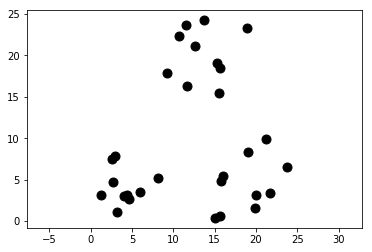

In [14]:
couleurs = {0 : 'yo', 1 : 'go', 2 : 'bo', 3 : 'co', 4 : 'mo', 5 : 'ro'}
couleurs_pred = {0 : 'ys', 1 : 'gs', 2 : 'bs', 3 : 'cs', 4 : 'ms', 5 : 'rs'}

nb_classes = points.shape[0]
classes = [i for i in range(nb_classes)]
hist_classes = []
hist_classes.append(classes.copy())
#print(hist_classes)
bars = points.copy()
for k in range(nb_classes):
    #plt.plot(points[k][0], points[k][1], couleurs[k])
    plt.plot(points[k][0], points[k][1], 'ko', markersize = size)
    plt.axis('equal')
#plt.savefig("output/cah/points_bruts.png")

In [15]:
mini = float("inf")
for ind1, bar1 in enumerate(bars):
    for ind2, bar2 in enumerate(bars):
        if ind1 != ind2:
            dist = sqrt((bar1[0] - bar2[0])**2 + (bar1[1] - bar2[1])**2)
            if dist < mini:
                miniL = [ind1, ind2]
                mini = dist

In [16]:
new_barX = (bars[miniL[0]][0] + bars[miniL[1]][0]) / 2
new_barY = (bars[miniL[0]][1] + bars[miniL[1]][1]) / 2
new_bar = [new_barX, new_barY]
#print(bars)
bars = np.delete(bars, miniL, axis = 0)
#print(bars)
bars = np.append(bars, [new_bar], axis = 0)
#print(bars)

In [17]:
for ind_pt, point in enumerate(points):
    dist = float("inf")
    for ind_bar, bar in enumerate(bars):
        calcul_dist = sqrt((point[0] - bar[0])**2 + (point[1] - bar[1])**2)
        if calcul_dist < dist:
            dist = sqrt((point[0] - bar[0])**2 + (point[1] - bar[1])**2)
            classes[ind_pt] = ind_bar

hist_classes.append(classes.copy())
#print(hist_classes)

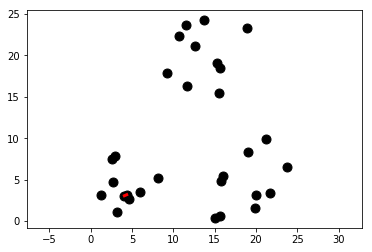

In [18]:
for i, k in enumerate(classes):
    #plt.plot(points[i][0], points[i][1], couleurs[k], markersize=size)
    plt.plot(points[i][0], points[i][1], 'ko', markersize=size)
    plt.axis('equal')
    ind = [l for l, j in enumerate(classes) if k == j]
    pts_draw = points[ind]
    X = pts_draw[:, 0]
    Y = pts_draw[:, 1]
    plt.plot(X, Y, linewidth = linesize, color = 'red')
place = 0
plt.savefig("output/cah/repartition" + str(place) + ".png")

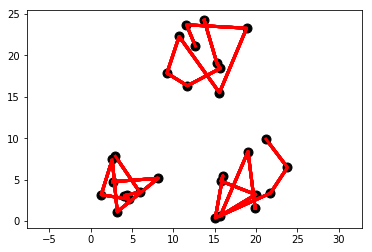

In [36]:
cond = True

while cond:
    mini = float("inf")
    for ind1, bar1 in enumerate(bars):
        for ind2, bar2 in enumerate(bars):
            if ind1 != ind2:
                dist = sqrt((bar1[0] - bar2[0])**2 + (bar1[1] - bar2[1])**2)
                if dist < mini:
                    miniL = [ind1, ind2]
                    mini = dist

    new_barX = (bars[miniL[0]][0] + bars[miniL[1]][0]) / 2
    new_barY = (bars[miniL[0]][1] + bars[miniL[1]][1]) / 2
    new_bar = [new_barX, new_barY]
    bars = np.delete(bars, miniL, axis = 0)
    bars = np.append(bars, [new_bar], axis = 0)

    for ind_pt, point in enumerate(points):
        dist = float("inf")
        for ind_bar, bar in enumerate(bars):
            calcul_dist = sqrt((point[0] - bar[0])**2 + (point[1] - bar[1])**2)
            if calcul_dist < dist:
                dist = sqrt((point[0] - bar[0])**2 + (point[1] - bar[1])**2)
                classes[ind_pt] = ind_bar

    hist_classes.append(classes.copy())
    #print(hist_classes)
    #print(bars.shape[0])
    
    if bars.shape[0] == 3:
        cond = False

for i, k in enumerate(classes):
    #plt.plot(points[i][0], points[i][1], couleurs[k], markersize=size)
    plt.plot(points[i][0], points[i][1], 'ko', markersize=size)
    plt.axis('equal')
    ind = [l for l, j in enumerate(classes) if k == j]
    pts_draw = points[ind]
    X = pts_draw[:, 0]
    Y = pts_draw[:, 1]
    plt.plot(X, Y, linewidth = linesize, color = 'red')
place += 1
plt.savefig("output/cah/repartition" + str(bars.shape[0]) + ".png")